In [14]:
# import modules
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras import backend
import numpy as np 
import pandas as pd
import os

import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

<Figure size 432x288 with 0 Axes>

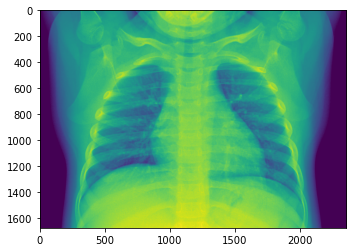

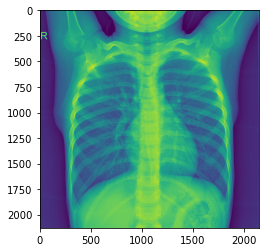

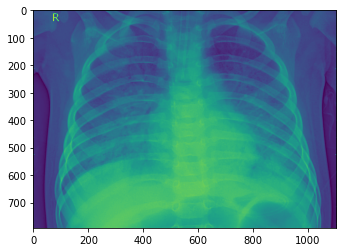

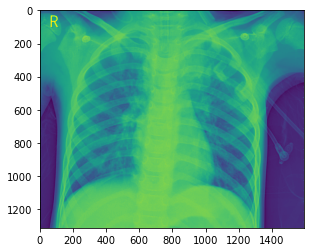

<Figure size 432x288 with 0 Axes>

In [15]:
# load dataset of x-ray images and show image
# dataset come from Kaggle "chest X-ray images (Pnuemonia)", URL: https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

dataset = "large_input"

train_normal = [mpimg.imread(img_path) for img_path in glob.glob(dataset+'/train/normal/*')]
train_pneumonia = [mpimg.imread(img_path) for img_path in glob.glob(dataset+'/train/pneumonia/*')]

test_normal = [mpimg.imread(img_path) for img_path in glob.glob(dataset+'/test/normal/*')]
test_pneumonia = [mpimg.imread(img_path) for img_path in glob.glob(dataset+'/test/pneumonia/*')]

plt.imshow(train_normal[0])
plt.figure()
plt.imshow(train_normal[1])
plt.figure()
plt.imshow(train_pneumonia[0])
plt.figure()
plt.imshow(train_pneumonia[1])
plt.figure()

In [16]:
print("train_normal:", len(train_normal))
print("train_pneumonia:", len(train_pneumonia))
print("test_normal:", len(test_normal))
print("test_pneumonia:", len(test_pneumonia))

train_normal: 400
train_pneumonia: 400
test_normal: 100
test_pneumonia: 100


In [88]:
# dimensions of our images.
# input processing code come from Kaggle expert Lviv, Lviv Oblas (Keras-NN | X-Ray | Predict pneumonia | 86.54%) URL: https://www.kaggle.com/kosovanolexandr/keras-nn-x-ray-predict-pneumonia-86-54#Binary-classification-with-Keras-neural-network

img_width, img_height = 288, 288

In [89]:
train_data_dir = 'large_input/train' 
validation_data_dir = 'large_input/test'


train_samples = 800
validation_samples = 200
epochs = 10
batch_size = 100

In [90]:
if backend.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [91]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

In [92]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 800 images belonging to 2 classes.


In [93]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 200 images belonging to 2 classes.


In [94]:
x_train, y_train = next(train_generator)
x_test, y_test = next(validation_generator)

In [95]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

In [96]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 286, 286, 32)      896       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 143, 143, 32)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 141, 141, 32)      9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 70, 70, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 68, 68, 64)        18496     
_________________________________________________________________
flatten_7 (Flatten)          (None, 295936)            0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)               

In [97]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [98]:
epochs=10

history = model.fit(
    x_train, y_train,
    steps_per_epoch=train_samples // batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test),
    validation_steps=validation_samples // batch_size)

Epoch 1/10
8/8 [==============================] - 9s 1s/step - loss: 2.1087 - accuracy: 0.5600 - val_loss: 0.6960 - val_accuracy: 0.4600
Epoch 2/10
8/8 [==============================] - 10s 1s/step - loss: 0.6917 - accuracy: 0.5000 - val_loss: 0.6872 - val_accuracy: 0.5600
Epoch 3/10
8/8 [==============================] - 9s 1s/step - loss: 0.6529 - accuracy: 0.5900 - val_loss: 0.7005 - val_accuracy: 0.5400
Epoch 4/10
8/8 [==============================] - 10s 1s/step - loss: 0.6050 - accuracy: 0.6600 - val_loss: 0.7405 - val_accuracy: 0.5400
Epoch 5/10
8/8 [==============================] - 10s 1s/step - loss: 0.7076 - accuracy: 0.6200 - val_loss: 0.6147 - val_accuracy: 0.6800
Epoch 6/10
8/8 [==============================] - 10s 1s/step - loss: 0.4008 - accuracy: 0.8300 - val_loss: 0.4976 - val_accuracy: 0.7600
Epoch 7/10
8/8 [==============================] - 10s 1s/step - loss: 0.2893 - accuracy: 0.9100 - val_loss: 0.4165 - val_accuracy: 0.8400
Epoch 8/10
8/8 [====================

In [99]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

In [100]:
model.save_weights('large_288.h5')

# evaluate the model
scores = model.evaluate(validation_generator)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

2/2 [==============================] - 5s 3s/step - loss: 0.4547 - accuracy: 0.7750

accuracy: 77.50%


2/2 - 3s - loss: 0.4547 - accuracy: 0.7750


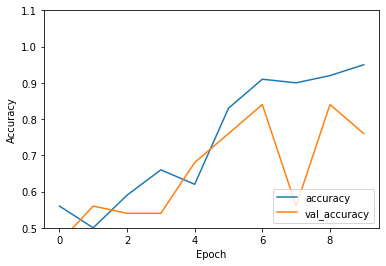

In [101]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(validation_generator, verbose=2)